# Training regression models on Energy consumption dataset

### Basic imports and Data Cleaning

In [29]:
import numpy as np
import pandas as pd

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=cd7dffd2-de9f-4de7-a5d5-4772074dd39f
To: /content/household_power_consumption.txt
100% 133M/133M [00:02<00:00, 47.1MB/s]


In [32]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

In [33]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [35]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


## Data type conversion

In [36]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [37]:
df.fillna(0, inplace=True)

# The attributes/columns in the dataframe are:

In [38]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Exploring Linear, Lasso, and Ridge Regression Models

In this section, we will explore and add Linear, Lasso, and Ridge regression models to our dataset. Our goal is to compare the performance of these models by evaluating their Root Mean Squared Error (RMSE) and accuracy scores. By doing so, we aim to understand which model best fits our data and provides the most accurate predictions. We will also analyze the impact of regularization on the model's performance, particularly focusing on Lasso and Ridge regression. This comparison will help us make informed decisions about the most suitable regression technique for our dataset.


## Linear Regression


In [39]:
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

#### Linear regression plot

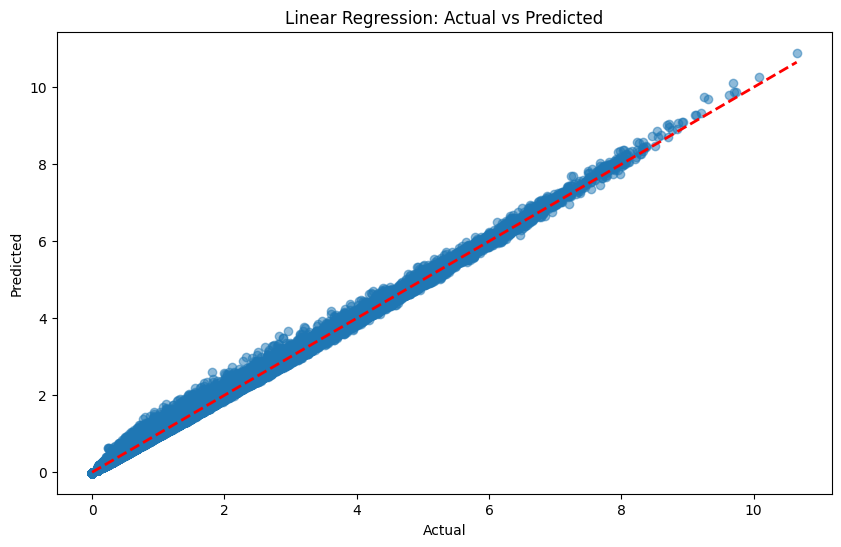

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

#### Accuracy and RMSE Score of the Linear Regression Model

In [41]:
accuracy = accuracy_score(y_test.round(), y_pred.round())
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Accuracy: {accuracy}')
print(f'RMSE: {rmse}')

Accuracy: 0.9661777319468404
RMSE: 0.04244129998501206


# Lasso Regression

In [42]:
# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

#### Lasso regression graph

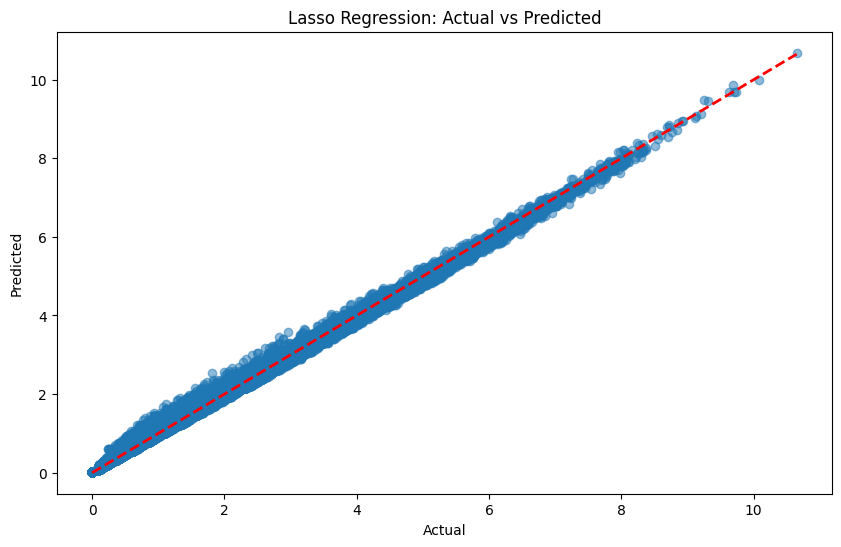

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()

#### Lasso regression accuracies

In [44]:
accuracy_lasso = accuracy_score(y_test.round(), y_pred_lasso.round())
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f'Lasso Regression Accuracy: {accuracy_lasso}')
print(f'Lasso Regression RMSE: {rmse_lasso}')

Lasso Regression Accuracy: 0.9504447635477
Lasso Regression RMSE: 0.05178557151464542


# Ridge regression

In [45]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

#### Ridge regression graph

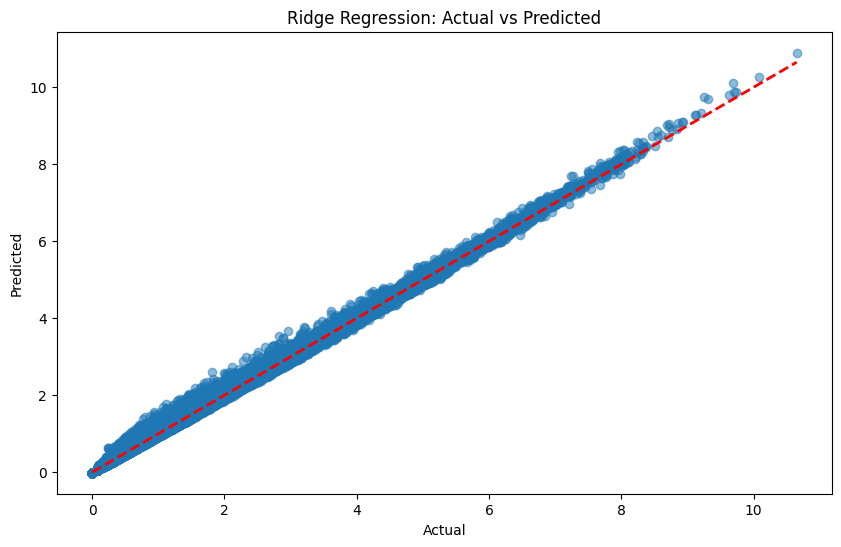

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

#### Accuracy and rsme score for ridge regression

In [47]:
accuracy_ridge = accuracy_score(y_test.round(), y_pred_ridge.round())
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f'Ridge Regression Accuracy: {accuracy_ridge}')
print(f'Ridge Regression RMSE: {rmse_ridge}')

Ridge Regression Accuracy: 0.9661777319468404
Ridge Regression RMSE: 0.04244130045307735


# RSME and Accuracy plots

### Comparing RSME scores across the three models

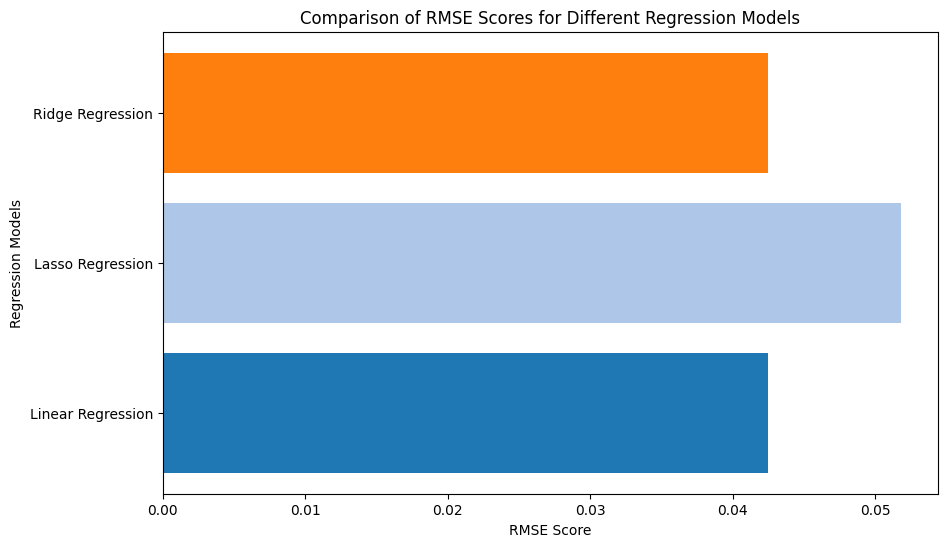

In [48]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_scores = [rmse, rmse_lasso, rmse_ridge]

plt.figure(figsize=(10, 6))
plt.barh(models, rmse_scores, color=['#1f77b4', '#aec7e8', '#ff7f0e'])
plt.xlabel('RMSE Score')
plt.ylabel('Regression Models')
plt.title('Comparison of RMSE Scores for Different Regression Models')
plt.show()

### Comparing accuracies across the three models

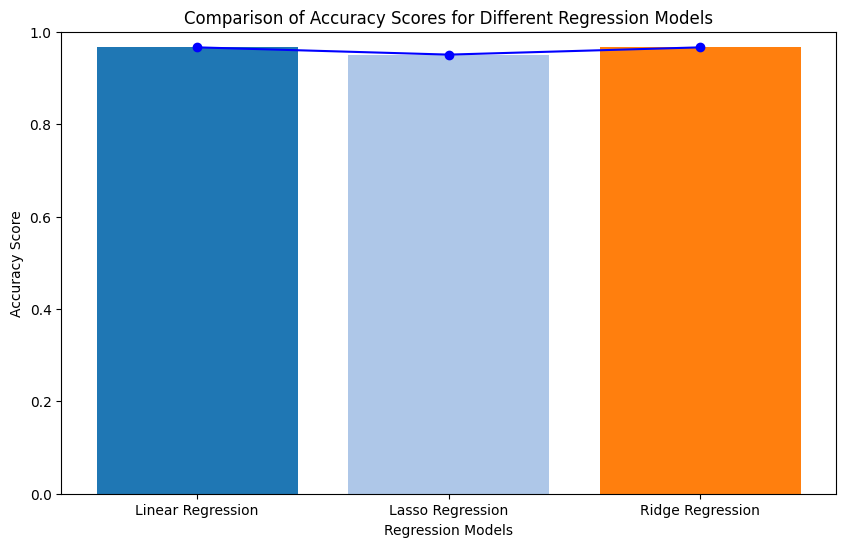

In [49]:
accuracies = [accuracy, accuracy_lasso, accuracy_ridge]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.bar(models, accuracies, color=['#1f77b4', '#aec7e8', '#ff7f0e'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Regression Models')
plt.ylim(0, 1)
plt.show()

## Observations from Regression Models

By creating and evaluating the Linear, Lasso, and Ridge regression models, we made the following observations:

1. **Accuracy**: Both Linear and Ridge regression models achieved the highest accuracy scores, indicating their strong performance in predicting the target variable.
2. **RMSE**: The RMSE scores for Linear and Ridge regression were very close, suggesting that both models have similar predictive capabilities. Lasso regression had a slightly higher RMSE, indicating a marginally lower performance.
3. **Regularization Impact**: The Lasso regression model, which includes L1 regularization, showed a slight decrease in accuracy and an increase in RMSE compared to the other models, highlighting the impact of regularization on model performance.